<a href="https://colab.research.google.com/github/Sofigam00s/Aprendizaje-Automatico-IA/blob/main/TP3_AA1_clasificaci%C3%B3n_Gamallo_Sofia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Sofia Antonia Gamallo 👩🏻**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

## Secondary Mushroom 🍄
Elegí este dataset sobre hongos clasificados binariamente como venenosos o comestibles.

Link: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

###Carga del dataset

In [42]:
#Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [43]:
pip install ucimlrepo

In [44]:
#Código extraído de la página UCI
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

In [45]:
df = pd.concat([secondary_mushroom.data.features, secondary_mushroom.data.targets], axis=1)
df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p


###Descripción del dataset 🖊️

Es un dataset de hongos creado artificialmente, inspirado en otro dataset sobre hongos reales, con el proposito de simular características que puedan clasificarlos como venenosos o comestibles.
Cuenta con 61,069 hongos hipotéticos basados en 173 especies reales.

### Descripción de las variables </>

* **Cap-diameter**: diámetro del sombrero del hongo en centímetros. Es de tipo numérica continua.

* **Cap-shape**: forma del sombrero del hongo (convexo, plano, cónico, etc.). Es de tipo categórica nominal.

* **Cap-surface**: textura de la superficie del sombrero (fibrosa, escamosa, lisa, etc.). Es de tipo categórica nominal.

* **Cap-color**: color del sombrero (rojo, blanco, amarillo, etc.). Es de tipo categórica nominal.

* **Does-bruise-or-bleed**: indica si el hongo se magulla o sangra al ser manipulado. Es de tipo categórica binaria.

* **Gill-attachment**: cómo las laminillas del hongo están unidas al tallo (adnato, libre, etc.). Es de tipo categórica nominal.

* **Gill-spacing**: distancia entre las laminillas del hongo (cercanas o distantes). Es de tipo categórica nominal.

* **Gill-color**: color de las laminillas del hongo. Es de tipo categórica nominal.

* **Stem-height**: altura del tallo del hongo en centímetros. Es de tipo numérica continua.

* **Stem-width**: ancho del tallo del hongo en milímetros. Es de tipo numérica continua.

* **Stem-root**: tipo de raíz del tallo (bulboso, hinchado, igual, etc.). Es de tipo categórica nominal.

* **Stem-surface**: textura de la superficie del tallo (fibrosa, lisa, escamosa, etc.). Es de tipo categórica nominal.

* **Stem-color**: color del tallo del hongo. Es de tipo categórica nominal.

* **Veil-type**: tipo de velo del hongo (parcial o universal). Es de tipo categórica nominal.

* **Veil-color**: color del velo del hongo. Es de tipo categórica nominal.

* **Has-ring**: indica si el hongo tiene anillo en el tallo. Es de tipo categórica binaria.

* **Ring-type**: tipo de anillo del hongo (pendiente, grande, escamoso, etc.). Es de tipo categórica nominal.

* **Spore-print-color**: color de la impresión de esporas del hongo. Es de tipo categórica nominal.

* **Habitat**: entorno donde crece el hongo (bosque, pradera, etc.). Es de tipo categórica nominal.

* **Season**: estación del año en la que aparece el hongo. Es de tipo categórica nominal.

* **Class**: clasificación del hongo como comestible o venenoso (p para venensiso y e para comestible). Es de tipo categórica binaria.


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

###Análisis de variables {🆇, ​ 🆈}

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

Con la función .info() se puede ver que el dataset cuenta con 21 columnas y 6,069 filas. En ciertas variables se pueden apreciar que hay valores faltantes, en algunas muchos más que en otras.
De las 21 columnas, solo 3 son de tipo numérica y todas las demás categóricas como se vio anteriormente en su descrpción.

In [47]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


La función .describe() muestra una descrición de las variables numéricas (que en este caso son solo 3, por el momento).

Las estadíticas son muy buenas y equilibradas, muestra una buena distribución de los datos que se puede apreciar con la poca desviación estándar y la similaridad entre la media y la mediana de cada variable.

###Visualización de variables 📊

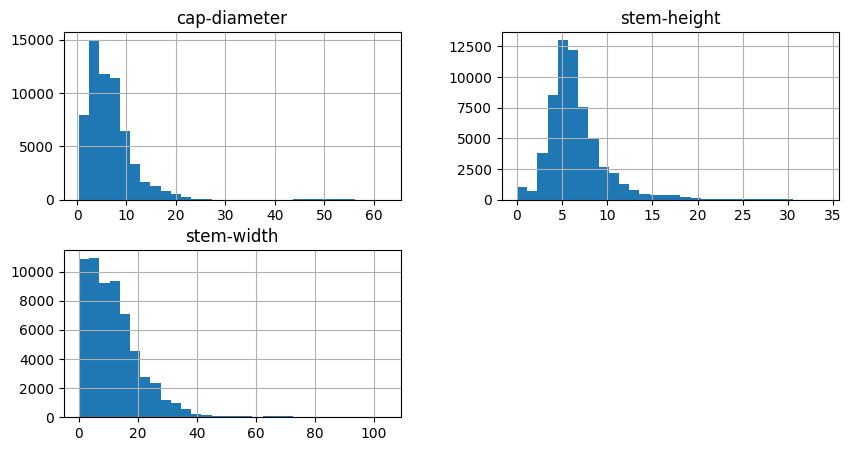

In [48]:
# Histogramas con las variables numéricas
df[['cap-diameter', 'stem-height', 'stem-width']].hist(figsize=(10, 5), bins=30)
plt.show()


El historigrama muestra una concentrción de los datos en valores bajos. Se pueden ver valores atípicos un poco altos por lo que hay un pequeño sesgo hacia la derecha. Para ver mejor estos valores atípicos realizo un gráfico de boxplot.

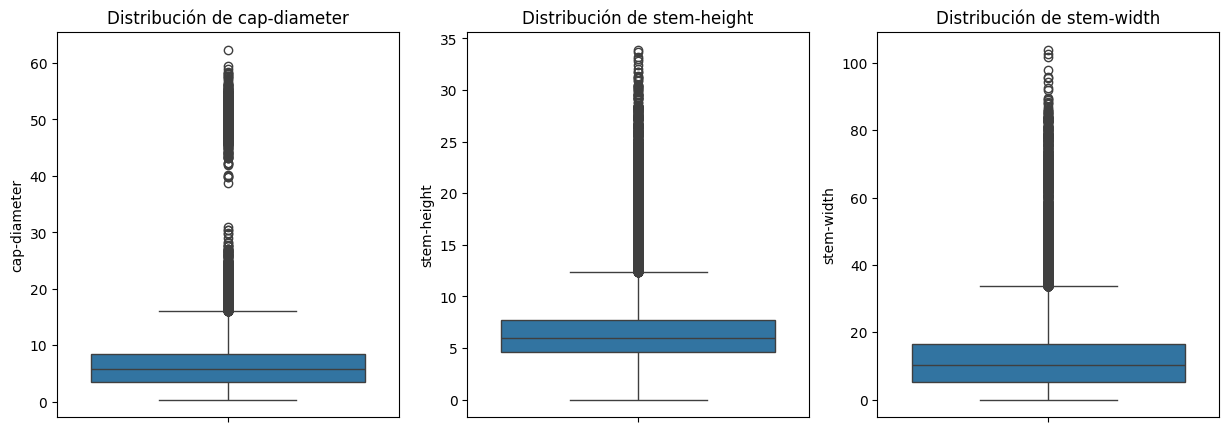

In [49]:
# Gráfico de outliers con boxplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['cap-diameter', 'stem-height', 'stem-width']):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
plt.show()

En el gráfico se ve una gran cantidad de outliers. Para no quedarme solo con esta interpretación calculo la cantidad y porcentaje que estos outliers representan en la totalidad de los datos.

In [50]:
# Definir límites de outliers usando el rango intercuartílico (IQR)
Q1 = df[['cap-diameter', 'stem-height', 'stem-width']].quantile(0.25)
Q3 = df[['cap-diameter', 'stem-height', 'stem-width']].quantile(0.75)
IQR = Q3 - Q1

# Contar la cantidad de outliers
outliers = ((df[['cap-diameter', 'stem-height', 'stem-width']] < (Q1 - 1.5 * IQR)) |
            (df[['cap-diameter', 'stem-height', 'stem-width']] > (Q3 + 1.5 * IQR))).sum()

# Calcular el porcentaje de outliers
total_rows = len(df)
percentage_outliers = (outliers / total_rows) * 100

# Mostrar resultados
print("Cantidad de outliers por variable:")
print(outliers)

print("\nPorcentaje de outliers por variable:")
print(percentage_outliers.round(2))

Cantidad de outliers por variable:
cap-diameter    2400
stem-height     3169
stem-width      1967
dtype: int64

Porcentaje de outliers por variable:
cap-diameter    3.93
stem-height     5.19
stem-width      3.22
dtype: float64


El porcentaje de los outliers en cada variable no supera más del 5,2% haciendo que sea una cantidad manejable.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

### Valores faltantes 📭❓

Para los valores faltantes voy a utilizar diferentes maneras de imputarlos o eliminarlos.
Primero, elijo eliminar las variables que menos datos tengan:

In [51]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0
stem-width,0


**stem-root**, **veil-type**, **veil-color** y **spore-print-color** son variables que tienen solo el 10% de los datos.
**gill-spacing** y **stem-surface** tienen el 50% o menos.
Al ser varibales categóricas, solo puedo impuarlas con la moda y como son demasiado valores faltantes, eso generaría demasiado ruido al modelo, por eso voy a eliminarlas.

In [52]:
df.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'gill-spacing', 'stem-surface'], axis=1, inplace=True)

Para las demás variables:
* **gill-attachment**
* **cap-surface**
* **ring-type**

Como sus valores faltantes representan no más del 30% voy a imputarlos con la moda:

In [53]:
# Variables a imputar
variables_a_imputar = ["gill-attachment", "cap-surface", "ring-type"]

# Reemplazar valores faltantes con la moda de cada columna
for col in variables_a_imputar:
    moda = df[col].mode()[0]
    df[col].fillna(moda, inplace=True)

# Verifico que todas las variables tengan sus datos completos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       61069 non-null  object 
 6   gill-color            61069 non-null  object 
 7   stem-height           61069 non-null  float64
 8   stem-width            61069 non-null  float64
 9   stem-color            61069 non-null  object 
 10  has-ring              61069 non-null  object 
 11  ring-type             61069 non-null  object 
 12  habitat               61069 non-null  object 
 13  season                61069 non-null  object 
 14  class                 61069 non-null  object 
dtypes: float64(3), obje

<ipython-input-53-b9faeb4041c9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


### Eliminar outliers 📶

Voy eliminar los outliers de las columnas numéricas que se vieron en el punto 2:

In [54]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['number'])

# Aplicar método IQR para detectar y eliminar outliers
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos dentro de los límites
df_clean = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

df = df_clean

In [70]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
has-ring,0


### Convertir todas las variables a numéricas

La mayoría de las variables en mi dataset son categóricas por lo que necesito transformarlas a formato numérico para que el modelo pueda aprovechar toda la información disponible. Esto garantizará que las características relevantes sean correctamente interpretadas en el proceso de entrenamiento:

In [56]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar Label Encoding a todas las variables categóricas
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

<ipython-input-56-9f5f8b252102>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
<ipython-input-56-9f5f8b252102>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
<ipython-input-56-9f5f8b252102>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
353,6.87,6,2,5,0,2,10,6.88,13.64,11,1,4,0,0,1
354,8.59,4,2,5,0,2,10,9.15,17.34,11,1,4,0,0,1
355,5.95,4,2,5,0,2,10,7.54,12.73,11,1,4,0,2,1
356,6.51,6,2,5,0,2,10,6.80,12.92,11,1,4,0,0,1
357,7.66,6,2,5,0,2,10,8.55,14.98,11,1,4,0,0,1


Ahora que todas las columnas son numéricas, quiero realizar un gráfico de correlación respecto a mi variable target ya que antes no podía por tener la mayoría de la variables categóricas.

class                   1.000000
ring-type               0.085958
has-ring                0.062516
cap-color               0.039181
cap-surface            -0.006655
habitat                -0.019147
does-bruise-or-bleed   -0.034738
season                 -0.051170
gill-color             -0.068903
gill-attachment        -0.092338
stem-height            -0.103201
cap-shape              -0.110637
stem-color             -0.112473
cap-diameter           -0.197518
stem-width             -0.201429
Name: class, dtype: float64


<ipython-input-57-347a04411565>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette="coolwarm")


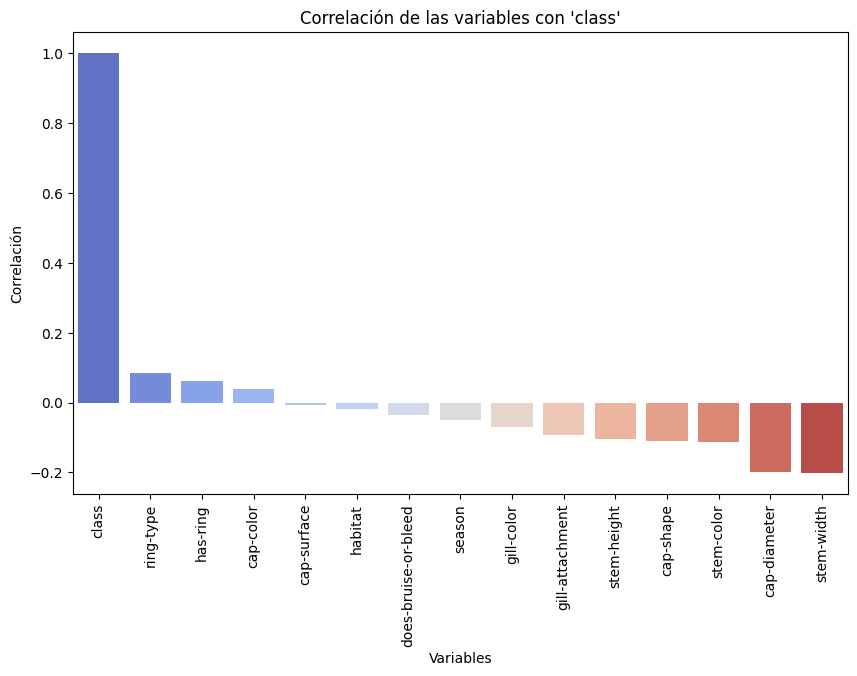

In [57]:
# Calcular la correlación con la variable target ('class')
correlation_with_class = df.corr()["class"].sort_values(ascending=False)

# Mostrar los valores de correlación
print(correlation_with_class)

# Visualizar la correlación en un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlación de las variables con 'class'")
plt.ylabel("Correlación")
plt.xlabel("Variables")
plt.show()


El gráfico permite tener una mejor visión en cuanto a las variables que más afectan a la clasificación de los hongos. De todas ellas, 'cap-surface' parece tener una correlación casi nula, por lo que es irrelevante dejarla en el dataset, así que lo mejor es eliminarla para evitar cualquier ruido:


In [58]:
df.drop('cap-surface', axis=1, inplace=True)

### Dividir y escalar datos

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
# Seleccionar variables numéricas y la variable objetivo
X = df.drop(columns=["class"])
y = df["class"]

# Dividir 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [63]:
# Entrenar LR con CV
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)

cv_scores_lr = cross_val_score(modelo_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Precisión promedio con CV: {np.mean(cv_scores_lr):.4f} ± {np.std(cv_scores_lr):.4f}")

# Entrenar modelo final
modelo_lr.fit(X_train_scaled, y_train)

Precisión promedio con CV: 0.6326 ± 0.0019


LogisticRegression(max_iter=1000, random_state=42)

El modelo de regresión logística con CV dio un resultado moderado del 63% de exactitud, pero no suficiente para este dataset.

### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

* Para las métricas voy a utilizar las mismas que se mencionan en el notebook de la clase 7:
  * **Excatitud (Accuracy):** porque las clases están balanceadas.
  * **Precisión:** los falsos positivos no son más costosos que los negativos, pero si son importantes.
  * **Sensibilidad o Recall:** porque los falsos negativos son más importantes.
  * **F1 score:** para ver si hay un balance entre la precisión y la sensibildad.

In [64]:
# Predicciones
y_train_pred_lr = modelo_lr.predict(X_train_scaled)
y_test_pred_lr = modelo_lr.predict(X_test_scaled)

# Métricas en el train
print("LR - RENDIMIENTO EN TRAIN:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_lr):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_lr):.4f}")
print()

# Métricas en test
print("LR - RENDIMIENTO EN TEST:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_lr):.4f}")
print()

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
print("MATRIZ DE CONFUSIÓN - LR:")
print("                  Com  Ven")
print(f"Real Comestible  {cm_lr[0,0]:3d}  {cm_lr[0,1]:3d}")
print(f"Real Venenoso    {cm_lr[1,0]:3d}  {cm_lr[1,1]:3d}")
print()

LR - RENDIMIENTO EN TRAIN:
Accuracy: 0.6329
Precision: 0.6457
Recall: 0.7630
F1-Score: 0.6995

LR - RENDIMIENTO EN TEST:
Accuracy: 0.6339
Precision: 0.6529
Recall: 0.7660
F1-Score: 0.7049

MATRIZ DE CONFUSIÓN - LR:
                  Com  Ven
Real Comestible  2193  2591
Real Venenoso    1489  4873



####**INTERPRETACIÓN:**
La exactitud demuestra que el modelo se equivoca bastante (solo el 63% precide correctamente).

Predice mejor los verdaderos negativos (recall de 76%) pero no taanto los verdaderos positivos (precisión de 64%).

Hay similitud en el rendimiento del train y test por lo tanto no hay sobreajuste.

En cuanto a la matriz de confusión, lo más importante es que predice 1489 hongos venenosos como si fueran comestibles, esto es peligroso. De igual manera, precide 2591 hongos comestibles como si fueran venesos, y si bien no es peligroso como el caso anterior, dificultaría el uso beneficioso que se le puede dar a esos hongos (ya sea para comidas como para usos mdicinales, por ejemplo.)

## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

### 5.2 Entrenamiento del modelo.

* Voy a utilizar el modelos SVM por las siguientes razones:
  * Es excelente para dataset medianos (55.700 datos).
  * Funciona muy bien en clasificación binaria.
  * Ayuda a minimizar los falsos negativos, que en este caso es muy importante.
  * Es un modelo robusto y tiene capacidad para generalizar muy bien.
  * Ya había utilizado kNN en otras materiales, además el modelo es simple para este dataset y requiere mucho tiempo de procesamiento.
  * MLP lo implementé en el trabajo n°4 de regresión y me pareció ideal utilizar SVM, que nunca lo había implementado.


Para este modelo tuve que usar una muestra de 15000 datos reales aleatorios de mi dataset original, porque aunque el modelo funcione sin problemas con una cantidad de datos de 55.700, no sé si es mi computadora o google colab que realentizó mucho la ejecución de la celda (casi dos horas y no se ejecutaba, incluso me dio error en otra ocación por el exceso de tiempo).

Por eso recurrí a usar una muestra para reducir el tiempo, sin embargo, esto no va a afectar a las métricas del modelo ni la matriz de confusión, ya que ellas se calculan sobre el testeo original de los datos (donde se dividieron los datos en 80/20 y se escalaron en el punto 3).

In [65]:
from sklearn.svm import SVC
# Realizar una muestra
sample_size = 15000
indices = np.random.choice(len(X_train_scaled), size=sample_size, replace=False)
X_train_sample = X_train_scaled[indices]
y_train_sample = y_train.iloc[indices]

# Entrenar SVM con CV (por defécto)
modelo_svm = SVC(random_state=42, probability=True)

cv_scores_svm = cross_val_score(modelo_svm, X_train_sample, y_train_sample, cv=5, scoring='accuracy')

print(f"SVM - Precisión promedio con CV: {np.mean(cv_scores_svm):.4f} ± {np.std(cv_scores_svm):.4f}")

# Entrenar modelo final con muestra
modelo_svm.fit(X_train_sample, y_train_sample)

SVM - Precisión promedio con CV: 0.9381 ± 0.0032


SVC(probability=True, random_state=42)

Implementar SVM mejoró muchísimo el score, del 63% al 93%. Es un muy buen modelo para este dataset.

### 5.3 Evaluación del desempeño

Voy a utilizar las mismas métricas que en la regresión logística.

In [66]:
# Predicciones SVM
y_test_pred_svm = modelo_svm.predict(X_test_scaled)

# Métricas train
print("SVM - RENDIMIENTO EN TRAIN:")
print(f"Accuracy: {accuracy_score(y_train_sample, modelo_svm.predict(X_train_sample)):.4f}")
print(f"Precision: {precision_score(y_train_sample, modelo_svm.predict(X_train_sample)):.4f}")
print(f"Recall: {recall_score(y_train_sample, modelo_svm.predict(X_train_sample)):.4f}")
print(f"F1-Score: {f1_score(y_train_sample, modelo_svm.predict(X_train_sample)):.4f}")
print()

# Métricas test
print("SVM - RENDIMIENTO EN TEST:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_svm):.4f}")
print()

# Matriz de confusión SVM
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
print("MATRIZ DE CONFUSIÓN - SVM:")
print("                  Com  Ven")
print(f"Real Comestible  {cm_svm[0,0]:3d}  {cm_svm[0,1]:3d}")
print(f"Real Venenoso    {cm_svm[1,0]:3d}  {cm_svm[1,1]:3d}")
print()

SVM - RENDIMIENTO EN TRAIN:
Accuracy: 0.9480
Precision: 0.9520
Recall: 0.9550
F1-Score: 0.9535

SVM - RENDIMIENTO EN TEST:
Accuracy: 0.9481
Precision: 0.9505
Recall: 0.9590
F1-Score: 0.9547

MATRIZ DE CONFUSIÓN - SVM:
                  Com  Ven
Real Comestible  4466  318
Real Venenoso    261  6101



####**INTERPRETACIÓN:**
 La exactitud mejoró muchisimo y el modelo no se equivoca mucho.

 Reduce mucho los falsos negativos (recall de 95%) y los falsos positivos (sensibilidad de 95%).

 Hay una buen balance entre precisión y recall.

 No hay sobreajuste, el modelo generaliza muy bien.

 En la matriz de confusión, los hongos venenosos clasificados como comestibles pasaron de 1444 a 261, es una gran reducción de error. También se redujeron los falsos positivos, de 2639 a solo 353.

 El modelo utilizando los hiperpárametros por defecto ya es muy eficiente, se podría utilizar de esta manera sin costar un gran problema.

## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

Para el tuneo voy a realzar una muestra un poco más pequeña que el modelo original (de 15.000 datos a 10.000) porque quiero evaluar varias combinacionaciones de parámetros y esto cuesta un mayor tiempo de entrenamiento. Por el mismo motivo solo voy a utilizar dos hiperpárametros: *C* y *kernel* pero con diferentes valores.

In [67]:
from sklearn.model_selection import GridSearchCV

# Defnir parámetros
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly']
}

# Usar muestra más chica para probar varios parámetros
grid_sample_size = 10000
grid_indices = np.random.choice(len(X_train_sample), size=grid_sample_size, replace=False)
X_grid_sample = X_train_sample[grid_indices]
y_grid_sample = y_train_sample.iloc[grid_indices]

grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=3,  # Reducir a 3 folds por tiempo
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svm.fit(X_grid_sample, y_grid_sample)

print("RESULTADOS DEL GRID SEARCH:")
print(f"Mejores parámetros: {grid_search_svm.best_params_}")
print(f"Mejor score CV: {grid_search_svm.best_score_:.4f}")
print()

RESULTADOS DEL GRID SEARCH:
Mejores parámetros: {'C': 100, 'kernel': 'rbf'}
Mejor score CV: 0.9828



GRID encontró la mejor combinación de parámetros con un score del 98%, casi perfecto.

In [68]:
# Evaluar modelo optimizado
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train_sample, y_train_sample)  # Re-entrenar con muestra completa
y_test_pred_best_svm = best_svm.predict(X_test_scaled)

# Métricas
print("SVM TUNEADO - RENDIMIENTO EN TRAIN:")
print(f"Accuracy: {accuracy_score(y_train_sample, best_svm.predict(X_train_sample)):.4f}")
print(f"Precision: {precision_score(y_train_sample, best_svm.predict(X_train_sample)):.4f}")
print(f"Recall: {recall_score(y_train_sample, best_svm.predict(X_train_sample)):.4f}")
print(f"F1-Score: {f1_score(y_train_sample, best_svm.predict(X_train_sample)):.4f}")
print()

print("SVM TUNEADO - RENDIMIENTO EN TEST:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_best_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_best_svm):.4f}")
print()

# Matriz de confusión SVM optimizado
cm_svm = confusion_matrix(y_test, y_test_pred_best_svm)
print("MATRIZ DE CONFUSIÓN - SVM:")
print("                  Com  Ven")
print(f"Real Comestible  {cm_svm[0,0]:3d}  {cm_svm[0,1]:3d}")
print(f"Real Venenoso    {cm_svm[1,0]:3d}  {cm_svm[1,1]:3d}")
print()

SVM TUNEADO - RENDIMIENTO EN TRAIN:
Accuracy: 0.9967
Precision: 0.9962
Recall: 0.9978
F1-Score: 0.9970

SVM TUNEADO - RENDIMIENTO EN TEST:
Accuracy: 0.9894
Precision: 0.9890
Recall: 0.9925
F1-Score: 0.9907

MATRIZ DE CONFUSIÓN - SVM:
                  Com  Ven
Real Comestible  4714   70
Real Venenoso     48  6314



####**INTERPRETACIÓN:**

El modelo casi no se equivoca (exactitud del 99%).

Clasifica correctamente a los verdaderos negativos (recall de 99%) y los verdaderos positivos (precisión de 99%).

Se puede decir que hay un pequeño sobreajuste comparando con el train/test de los modelos anteriores, pero realmente este sobreajuste es demasiado bajo y considero que no tendrá un efecto negativo a gran escala.

En esta matriz de decisión se puede ver realmente la mejora de los falsos negativos y positivos. Pasamos de clasificar incorrectamente a 1489 hongos venesosos como comestibles a 48, y de 2591 hongos comestibles como venenosos a nada más que 70.

Este sin duda es el mejor modelo que se puede implementar para este dataset de clasificación binaria.

### Evaluar con otros modelos rapidamente

In [69]:

modelos_comparacion = {
    'Logistic Regression': {
        'CV_Score': np.mean(cv_scores_lr),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred_lr),
        'Test_F1': f1_score(y_test, y_test_pred_lr),
        'Test_Recall': recall_score(y_test, y_test_pred_lr)
    },
    'SVM (default)': {
        'CV_Score': np.mean(cv_scores_svm),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred_svm),
        'Test_F1': f1_score(y_test, y_test_pred_svm),
        'Test_Recall': recall_score(y_test, y_test_pred_svm)
    },
    'SVM (optimizado)': {
        'CV_Score': grid_search_svm.best_score_,
        'Test_Accuracy': accuracy_score(y_test, y_test_pred_best_svm),
        'Test_F1': f1_score(y_test, y_test_pred_best_svm),
        'Test_Recall': recall_score(y_test, y_test_pred_best_svm)
    },
}

df_comparacion = pd.DataFrame(modelos_comparacion).T
print("TABLA COMPARATIVA:")
print(df_comparacion.round(4))
print()

print("ANÁLISIS DE FALSOS NEGATIVOS")
print()
print("Falsos Negativos por modelo (hongos venenosos clasificados como comestibles):")
for nombre, pred in [('Logistic Regression', y_test_pred_lr),
                     ('SVM default', y_test_pred_svm),
                     ('SVM optimizado', y_test_pred_best_svm)]:
    cm = confusion_matrix(y_test, pred)
    fn = cm[1,0]
    total_venenosos = cm[1,0] + cm[1,1]
    porcentaje_fn = (fn / total_venenosos) * 100
    print(f"{nombre:20}: {fn:4d} FN ({porcentaje_fn:.1f}% de hongos venenosos)")

TABLA COMPARATIVA:
                     CV_Score  Test_Accuracy  Test_F1  Test_Recall
Logistic Regression    0.6326         0.6339   0.7049       0.7660
SVM (default)          0.9381         0.9481   0.9547       0.9590
SVM (optimizado)       0.9828         0.9894   0.9907       0.9925

ANÁLISIS DE FALSOS NEGATIVOS

Falsos Negativos por modelo (hongos venenosos clasificados como comestibles):
Logistic Regression : 1489 FN (23.4% de hongos venenosos)
SVM default         :  261 FN (4.1% de hongos venenosos)
SVM optimizado      :   48 FN (0.8% de hongos venenosos)


## 6- Conclusiones

Fundamente, justifique con sus palabras.

En este desempeño se trabajó sobre un dataset de hongos clasificados binariamente como venenosos o comestibles. Se hizo su prepocesamiento con la correcta limpieza de datos y se entrenaron en un 80/20.

Se implementaron dos modelos distintos de clasificación, primero con Regresión Logística y luego con SVM y SVM optimizado utilizando la validación cruzada para asegurar que tengan un buen rendimiento y no haya sido solo por casualdad.

Por último se compararon todos los modelos y los resultados demostraron que la regresión logistica es un mal modelo para este dataset específico (con una exactitud media del 63% y un 23,4% de falsos negativos). Por el contrario, el modelo SVM funcionó perfecto para esta clasificación (93% de exactitud y 4% de falsos negativos), y el tuneo de hiperparámetros permitió una mejora casi perfecta del 98% de exactitud y solo un 0.8% de falsos negativos. Lo que demuestra que SVM fue una correcta elección.

En cuanto a mi experiencia personal en este trabajo, me di cuenta que tuve una mejora notable en la parte de preprocesamiento de los datos ya que en esta ocación pude ser más eficiente a la hora de tomar una decisión sobre el análisis, eliminación de variables, manejo de valores nulos o atípicos y ennumerar variables categóricas.
También me fue menos difícil comprender los modelos de clasificación porque ya tengo asimilada la 'arquitectura' del código que se implementa en ellos. Lo mismo con las métricas, puedo comprenderlas más fácil y rápido que en los trabajos anteriores.
Me gustó haber probado varios modelos con diferentes parámetros para comprender la importancia que tienen a la hora de trabajar con un determinado dataset. En mi caso elegí uno que tenía clasificación binaria pensando que era lo ideal para la regresión logística, pero al momento de entrenar el modelo no tuvo un buen rendimiento, demostrándome que lo 'ideal' no funciona en el aprendizaje automático, lo hacen las prácticas y pruebas.

# Referencias

Mencione los recursos utilizados

* Notebook de la materia ***Clasificación binaria***
* Notebook de la materia ***Validación cruzada***
* Uso de Copilot y CHAT-GPT para que me ayude a generar la implemetación de los modelos.
* https://stackoverflow.com/questions/39163354/evaluating-logistic-regression-with-cross-validation
* https://developer.ibm.com/tutorials/awb-classifying-data-svm-algorithm-python/
* https://www.kaggle.com/code/prashant111/svm-classifier-tutorial
* https://stackabuse.com/understanding-svm-hyperparameters/